In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [2]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

# 50 stars

## make an array of just the observational times

In [19]:
burst50=np.load('/home/lee/data/cluster_size_change/3x_burst/burst50_3x.npy')
L50=np.load('/home/lee/data/cluster_size_change/3x_burst/L50_3x.npy')
C50=np.load('/home/lee/data/cluster_size_change/3x_burst/C50_3x.npy')

In [20]:
cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
            cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

In [21]:
print(L50[0,6,:])

[-2.5446693 -2.5446693 -2.5446693 ... -2.5446693 -3.7946693 -3.7946693]


In [118]:
print(cad_L50[0,0,:])

[-2.23306029 -0.98306029 -0.98306029 -0.98306029 -2.23306029 -0.98306029
 -0.98306029 -0.98306029 -2.23306029 -2.23306029 -0.98306029 -2.23306029]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [137]:
obs_burst50=np.zeros((run,cluster_size50,36))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(1,12):
            if cad_L50[i,k,j]-cad_L50[i,k,j-1]==1.25:
                obs_burst50[i,k,(3*j)-2:(3*j)]=1
            elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==1.25:
               obs_burst50[i,k,(3*j)+1:(3*j)+3]=1
            #elif cad_L50[i,k,j]==cad_L50[i,k,j-1] and obs_burst50[i,k,(3*j)-1]==1:
            #    obs_burst50[i,k,(3*j)+1:(3*j)+3]=1
            #    print(i,k)

In [138]:
print(obs_burst50[0,0,:])

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


## if a non observation, convert 0 to nan and convert 1 to 0

In [139]:
edit50=np.zeros((run,cluster_size50,36))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,36):
            if j%3==0 or j==0:
                if obs_burst50[i,k,j+1]==0:
                    edit50[i,k,j]=np.nan
                elif obs_burst50[i,k,j+1]==1:
                    edit50[i,k,j]=1
            elif (j+1)%3==0:
                if obs_burst50[i,k,j]==0:
                    edit50[i,k,j]=np.nan
                elif obs_burst50[i,k,j]==1:
                    edit50[i,k,j]=obs_burst50[i,k,j]
            else:
                edit50[i,k,j]=obs_burst50[i,k,j]

In [140]:
print(edit50[0,6,:])

[nan  0. nan nan  0. nan nan  0. nan nan  0. nan  1.  1.  1. nan  0. nan
 nan  0. nan nan  0. nan nan  0. nan  1.  1.  1. nan  0. nan nan  0. nan]


## count the number of zeros and ones

In [141]:
num3_50=0
list3_50=[]
num0_50=0
list0_50=[]

for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,36):
            if obs_burst50[i,k,j]==1:
                num3_50+=1
            elif obs_burst50[i,k,j]==0:
                num0_50+=1
    list3_50.append(num3_50)
    num3_50=0
    list0_50.append(num0_50)
    num0_50=0

## convert it to mass

In [142]:
mass3_50=[]
mass0_50=[]
for i in range(run):
    mass3_50.append(list3_50[i]*3)
    mass0_50.append(list0_50[i]*1)

## find fraction

In [143]:
frac3_50=[]
frac0_50=[]
for i in range(run):
    total50=mass3_50[i]+mass0_50[i]
    frac3_50.append(100*mass3_50[i]/total50)
    frac0_50.append(100*mass0_50[i]/total50)

## plot it

/tmp/ipykernel_125693/3675865931.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


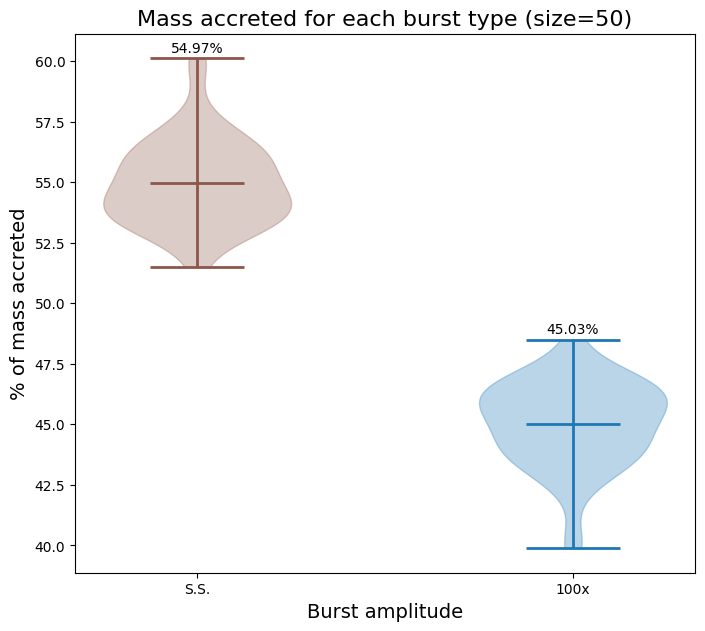

In [144]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_50,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_50))
string3='{:.2f}%'.format(np.mean(frac3_50))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_50)+0.25,string0,ha='center')
ax1.text(2,np.max(frac3_50)+0.25,string3,ha='center')
plt.title('Mass accreted for each burst type (size=50)',fontsize=16)
plt.show()    

# 100 stars

## make an array of just observational times

In [108]:
burst100=np.load('/home/lee/data/cluster_size_change/3x_burst/burst100_3x.npy')
L100=np.load('/home/lee/data/cluster_size_change/3x_burst/L100_3x.npy')
C100=np.load('/home/lee/data/cluster_size_change/3x_burst/C100_3x.npy')

In [109]:
cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
            cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [145]:
obs_burst100=np.zeros((run,cluster_size100,36))
for i in range(run):
    for k in range(cluster_size100):
        for j in range(1,12):
            if cad_L100[i,k,j]-cad_L100[i,k,j-1]==1.25:
                obs_burst100[i,k,(3*j)-2:(3*j)]=1
            elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==1.25:
               obs_burst100[i,k,(3*j)+1:(3*j)+3]=1
            #elif cad_L100[i,k,j]==cad_L100[i,k,j-1] and obs_burst100[i,k,(3*j)-1]==1:
            #    obs_burst100[i,k,(3*j)+1:(3*j)+3]=1

## if a non observation, convert 0 to nan and convert 1 to 0

In [146]:
edit100=np.zeros((run,cluster_size100,36))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,36):
            if j%3==0 or j==0:
                if obs_burst100[i,k,j+1]==0:
                    edit100[i,k,j]=np.nan
                elif obs_burst100[i,k,j+1]==1:
                    edit100[i,k,j]=1
            elif (j+1)%3==0:
                if obs_burst100[i,k,j]==0:
                    edit100[i,k,j]=np.nan
                elif obs_burst100[i,k,j]==1:
                    edit100[i,k,j]=obs_burst100[i,k,j]
            else:
                edit100[i,k,j]=obs_burst100[i,k,j]

## count the number of zeros and ones

In [147]:
num3_100=0
list3_100=[]
num0_100=0
list0_100=[]

for i in range(run):
    for k in range(cluster_size100):
        for j in range(0,36):
            if edit100[i,k,j]==1:
                num3_100+=1
            elif edit100[i,k,j]==0:
                num0_100+=1
    list3_100.append(num3_100)
    num3_100=0
    list0_100.append(num0_100)
    num0_100=0

## convert to mass

In [148]:
mass3_100=[]
mass0_100=[]
for i in range(run):
    mass3_100.append(list3_100[i]*3)
    mass0_100.append(list0_100[i]*1)

## find fraction

In [149]:
frac3_100=[]
frac0_100=[]
for i in range(run):
    total100=mass3_100[i]+mass0_100[i]
    frac3_100.append(100*mass3_100[i]/total100)
    frac0_100.append(100*mass0_100[i]/total100)

## plot it

/tmp/ipykernel_125693/2894901935.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


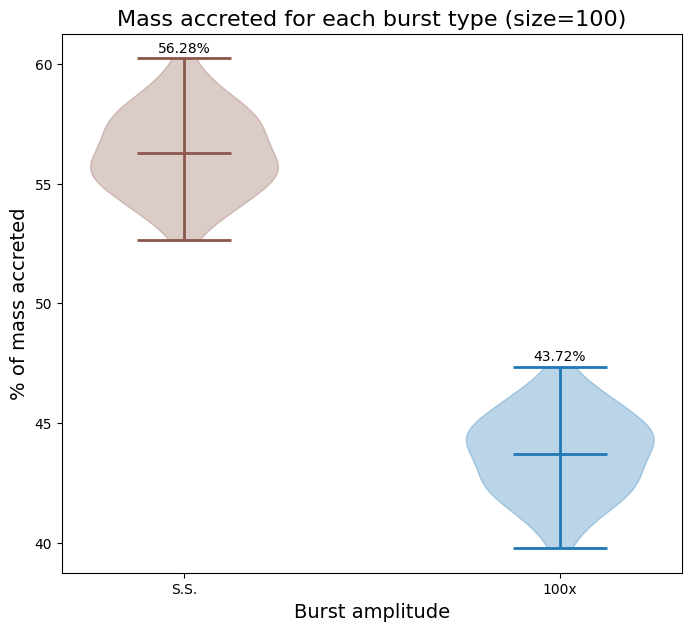

In [150]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_100,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_100))
string3='{:.2f}%'.format(np.mean(frac3_100))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_100)+0.25,string0,ha='center')
ax1.text(2,np.max(frac3_100)+0.25,string3,ha='center')
plt.title('Mass accreted for each burst type (size=100)',fontsize=16)
plt.show()    

# 500 stars

## make an array of observational times

In [538]:
burst500=np.load('/home/lee/data/cluster_size_change/3x_burst/burst500_3x.npy')
L500=np.load('/home/lee/data/cluster_size_change/3x_burst/L500_3x.npy')
C500=np.load('/home/lee/data/cluster_size_change/3x_burst/C500_3x.npy')

In [539]:
cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
            cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [552]:
obs_burst500=np.zeros((run,cluster_size500,36))
for i in range(run):
    for k in range(cluster_size500):
        for j in range(1,12):
            if cad_L500[i,k,j]-cad_L500[i,k,j-1]==1.25:
                obs_burst500[i,k,(3*j)-2:(3*j)]=1
            if cad_L500[i,k,j-1]-cad_L500[i,k,j]==1.25:
               obs_burst500[i,k,(3*j)+1:(3*j)+3]=1
            #elif cad_L500[i,k,j]==cad_L500[i,k,j-1] and obs_burst500[i,k,(3*j)-1]==1:
            #    obs_burst500[i,k,(3*j)+1:(3*j)+3]=1

## if non observation, convert 0 to nan

In [553]:
edit500=np.zeros((run,cluster_size50,36))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,36):
            if j%3==0 or j==0:
                if obs_burst500[i,k,j+1]==0:
                    edit500[i,k,j]=np.nan
                elif obs_burst500[i,k,j+1]==1:
                    edit500[i,k,j]=1
            elif (j+1)%3==0:
                if obs_burst500[i,k,j]==0:
                    edit500[i,k,j]=np.nan
                elif obs_burst500[i,k,j]==1:
                    edit500[i,k,j]=obs_burst500[i,k,j]
            else:
                edit500[i,k,j]=obs_burst500[i,k,j]

## count number of zeros and ones

In [558]:
num3_500=0
list3_500=[]
num0_500=0
list0_500=[]

for i in range(run):
    for k in range(cluster_size500):
        for j in range(0,36):
            if edit500[i,k,j]==1:
                num3_500+=1
            elif edit500[i,k,j]==0:
                num0_500+=1
    list3_500.append(num3_500)
    num3_500=0
    list0_500.append(num0_500)
    num0_500=0

## convert to mass

In [559]:
mass3_500=[]
mass0_500=[]
for i in range(run):
    mass3_500.append(list3_500[i]*3)
    mass0_500.append(list0_500[i]*1)

## find fraction

In [560]:
frac3_500=[]
frac0_500=[]
for i in range(run):
    total500=mass3_500[i]+mass0_500[i]
    frac3_500.append(100*mass3_500[i]/total500)
    frac0_500.append(100*mass0_500[i]/total500)

## plot it

/tmp/ipykernel_115986/340860523.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


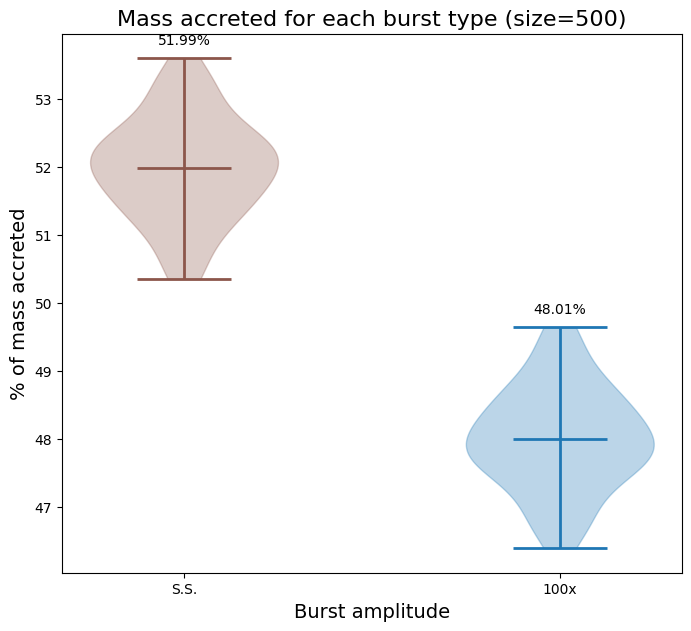

In [562]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_500,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_500,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_500))
string3='{:.2f}%'.format(np.mean(frac3_500))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_500)+0.2,string0,ha='center')
ax1.text(2,np.max(frac3_500)+0.2,string3,ha='center')
plt.title('Mass accreted for each burst type (size=500)',fontsize=16)
plt.show()  

# 1000 stars

## make an array of observational times

In [563]:
burst1000=np.load('/home/lee/data/cluster_size_change/3x_burst/burst1000_3x.npy')
L1000=np.load('/home/lee/data/cluster_size_change/3x_burst/L1000_3x.npy')
C1000=np.load('/home/lee/data/cluster_size_change/3x_burst/C1000_3x.npy')

In [564]:
cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
            cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

In [565]:
print(cad_L1000[0,128,:])

[-4.59680798 -4.59680798 -4.59680798 -5.84680798 -5.84680798 -4.59680798
 -4.59680798 -4.59680798 -5.84680798 -4.59680798 -4.59680798 -4.59680798]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [566]:
obs_burst1000=np.zeros((run,cluster_size1000,36))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(1,12):
            if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==1.25:
                obs_burst1000[i,k,(3*j)-2:(3*j)]=1
            if cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==1.25:
               obs_burst1000[i,k,(3*j)+1:(3*j)+3]=1
            #elif cad_L1000[i,k,j]==cad_L1000[i,k,j-1] and obs_burst1000[i,k,(3*j)-1]==1:
            #    obs_burst1000[i,k,(3*j)+1:(3*j)+3]=1

## if non observation, convert 0 to nan

In [567]:
edit1000=np.zeros((run,cluster_size1000,36))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(0,36):
            if j%3==0 or j==0:
                if obs_burst1000[i,k,j+1]==0:
                    edit1000[i,k,j]=np.nan
                elif obs_burst1000[i,k,j+1]==1:
                    edit1000[i,k,j]=1
            elif (j+1)%3==0:
                if obs_burst1000[i,k,j]==0:
                    edit1000[i,k,j]=np.nan
                elif obs_burst1000[i,k,j]==1:
                    edit1000[i,k,j]=obs_burst1000[i,k,j]
            else:
                edit1000[i,k,j]=obs_burst1000[i,k,j]

## count number of zeros and ones

In [568]:
num3_1000=0
list3_1000=[]
num0_1000=0
list0_1000=[]

for i in range(run):
    for k in range(cluster_size1000):
        for j in range(0,36):
            if edit1000[i,k,j]==1:
                num3_1000+=1
            elif edit1000[i,k,j]==0:
                num0_1000+=1
    list3_1000.append(num3_1000)
    num3_1000=0
    list0_1000.append(num0_1000)
    num0_1000=0

## convert to mass

In [570]:
mass3_1000=[]
mass0_1000=[]
for i in range(run):
    mass3_1000.append(list3_1000[i]*3)
    mass0_1000.append(list0_1000[i]*1)

## find fraction

In [573]:
frac3_1000=[]
frac0_1000=[]
for i in range(run):
    total1000=mass3_1000[i]+mass0_1000[i]
    frac3_1000.append(100*mass3_1000[i]/total1000)
    frac0_1000.append(100*mass0_1000[i]/total1000)

## plot it

/tmp/ipykernel_115986/3782309462.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


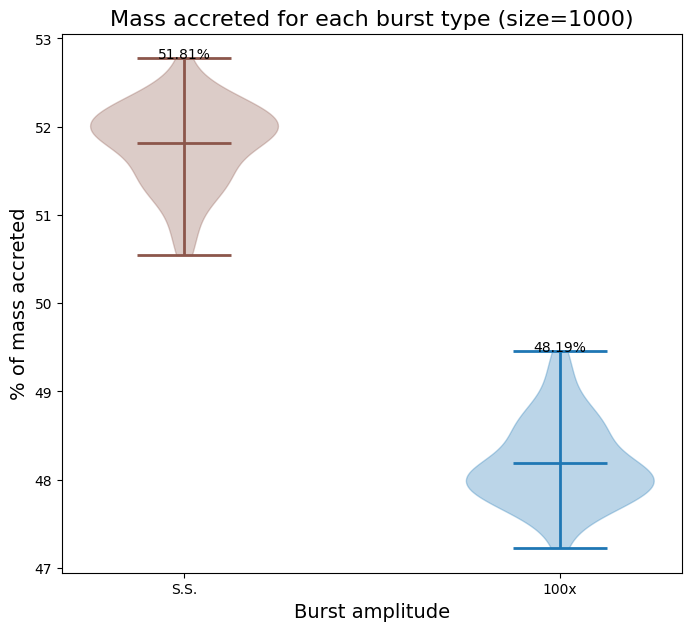

In [575]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_1000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_1000))
string3='{:.2f}%'.format(np.mean(frac3_1000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_1000),string0,ha='center')
ax1.text(2,np.max(frac3_1000),string3,ha='center')
plt.title('Mass accreted for each burst type (size=1000)',fontsize=16)
plt.show()    

# 2000 stars

## make an array of observational times

In [576]:
burst2000=np.load('/home/lee/data/cluster_size_change/3x_burst/burst2000_3x.npy')
L2000=np.load('/home/lee/data/cluster_size_change/3x_burst/L2000_3x.npy')
C2000=np.load('/home/lee/data/cluster_size_change/3x_burst/C2000_3x.npy')

In [577]:
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [578]:
obs_burst2000=np.zeros((run,cluster_size2000,36))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==1.25:
                obs_burst2000[i,k,(3*j)-2:(3*j)]=1
            if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==1.25:
               obs_burst2000[i,k,(3*j)+1:(3*j)+3]=1
            #elif cad_L2000[i,k,j]==cad_L2000[i,k,j-1] and obs_burst2000[i,k,(3*j)-1]==1:
            #    obs_burst2000[i,k,(3*j)+1:(3*j)+3]=1

## if non observation, convert to nan

In [579]:
edit2000=np.zeros((run,cluster_size2000,36))
for i in range(run):
    for k in range(cluster_size200):
        for j in range(0,36):
            if j%3==0 or j==0:
                if obs_burst2000[i,k,j+1]==0:
                    edit2000[i,k,j]=np.nan
                elif obs_burst2000[i,k,j+1]==1:
                    edit2000[i,k,j]=1
            elif (j+1)%3==0:
                if obs_burst2000[i,k,j]==0:
                    edit2000[i,k,j]=np.nan
                elif obs_burst2000[i,k,j]==1:
                    edit2000[i,k,j]=obs_burst2000[i,k,j]
            else:
                edit2000[i,k,j]=obs_burst2000[i,k,j]

## count number of zeros and ones

In [580]:
num3_2000=0
list3_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,36):
            if edit2000[i,k,j]==1:
                num3_2000+=1
            elif edit2000[i,k,j]==0:
                num0_2000+=1
    list3_2000.append(num3_2000)
    num3_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

## convert to mass

In [581]:
mass3_2000=[]
mass0_2000=[]
for i in range(run):
    mass3_2000.append(list3_2000[i]*3)
    mass0_2000.append(list0_2000[i]*1)

## find fraction

In [582]:
frac3_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass3_2000[i]+mass0_2000[i]
    frac3_2000.append(100*mass3_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

## plot it

/tmp/ipykernel_115986/2599824745.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


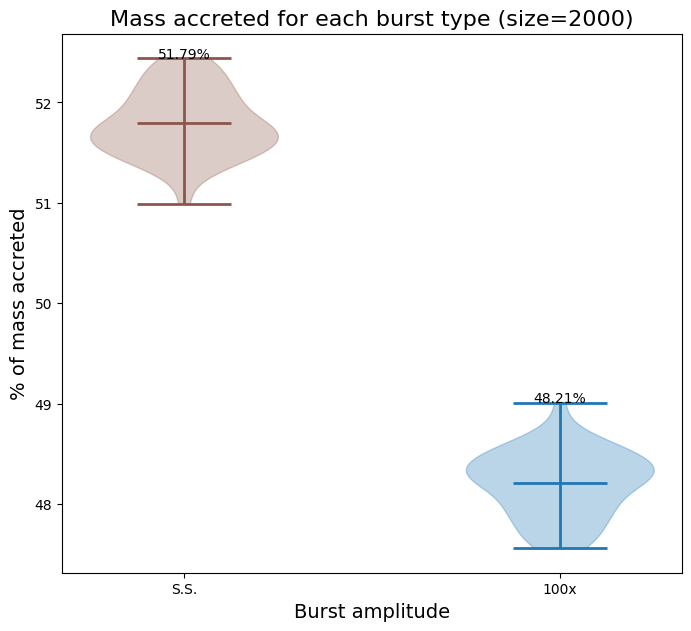

In [584]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_2000))
string3='{:.2f}%'.format(np.mean(frac3_2000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_2000),string0,ha='center')
ax1.text(2,np.max(frac3_2000),string3,ha='center')
plt.title('Mass accreted for each burst type (size=2000)',fontsize=16)
plt.show()    

# 5000 stars

## make an array of observational times

In [585]:
burst5000=np.load('/home/lee/data/cluster_size_change/3x_burst/burst5000_3x.npy')
L5000=np.load('/home/lee/data/cluster_size_change/3x_burst/L5000_3x.npy')
C5000=np.load('/home/lee/data/cluster_size_change/3x_burst/C5000_3x.npy')

In [586]:
cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
            cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [587]:
obs_burst5000=np.zeros((run,cluster_size5000,36))
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(1,12):
            if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==1.25:
                obs_burst5000[i,k,(3*j)-2:(3*j)]=1
            if cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==1.25:
               obs_burst5000[i,k,(3*j)+1:(3*j)+3]=1
            #elif cad_L5000[i,k,j]==cad_L5000[i,k,j-1] and obs_burst5000[i,k,(3*j)-1]==1:
            #    obs_burst5000[i,k,(3*j)+1:(3*j)+3]=1

## if non observation, convert to nan

In [588]:
edit5000=np.zeros((run,cluster_size5000,36))
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(0,36):
            if j%3==0 or j==0:
                if obs_burst5000[i,k,j+1]==0:
                    edit5000[i,k,j]=np.nan
                elif obs_burst50000[i,k,j+1]==1:
                    edit5000[i,k,j]=1
            elif (j+1)%3==0:
                if obs_burst5000[i,k,j]==0:
                    edit50[i,k,j]=np.nan
                elif obs_burst5000[i,k,j]==1:
                    edit5000[i,k,j]=obs_burst5000[i,k,j]
            else:
                edit5000[i,k,j]=obs_burst5000[i,k,j]

## count number of zeros and ones

In [589]:
num3_5000=0
list3_5000=[]
num0_5000=0
list0_5000=[]

for i in range(run):
    for k in range(cluster_size5000):
        for j in range(0,35):
            if edit5000[i,k,j]==1:
                num3_5000+=1
            elif edit5000[i,k,j]==0:
                num0_5000+=1
    list3_5000.append(num3_5000)
    num3_5000=0
    list0_5000.append(num0_5000)
    num0_5000=0

## convert to mass

In [590]:
mass3_5000=[]
mass0_5000=[]
for i in range(run):
    mass3_5000.append(list3_5000[i]*3)
    mass0_5000.append(list0_5000[i]*1)

## find fraction

In [591]:
frac3_5000=[]
frac0_5000=[]
for i in range(run):
    total5000=mass3_5000[i]+mass0_5000[i]
    frac3_5000.append(100*mass3_5000[i]/total5000)
    frac0_5000.append(100*mass0_5000[i]/total5000)

## plot it

/tmp/ipykernel_115986/3405305549.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


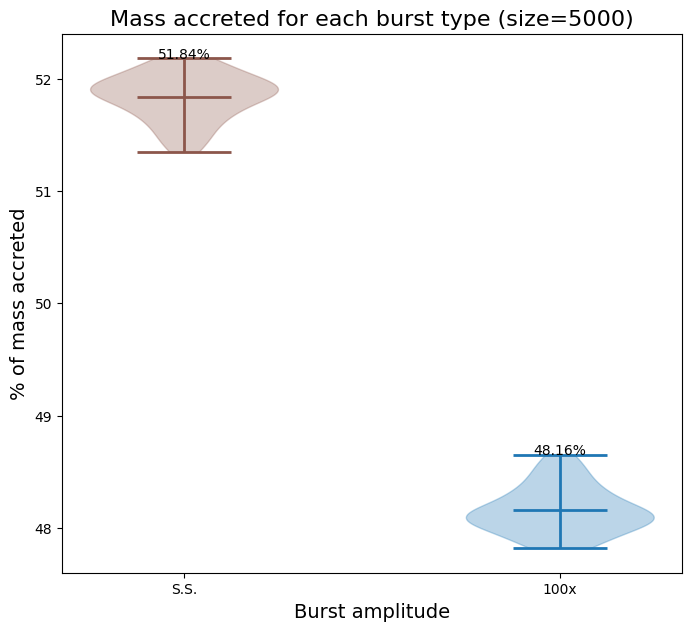

In [592]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_5000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_5000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_5000))
string3='{:.2f}%'.format(np.mean(frac3_5000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_5000),string0,ha='center')
ax1.text(2,np.max(frac3_5000),string3,ha='center')
plt.title('Mass accreted for each burst type (size=5000)',fontsize=16)
plt.show()    

In [594]:
#means and std
mean50=np.mean(frac3_50)
std50=np.std(frac3_50)
mean100=np.mean(frac3_100)
std100=np.std(frac3_100)
mean500=np.mean(frac3_500)
std500=np.std(frac3_500)
mean1000=np.mean(frac3_1000)
std1000=np.std(frac3_1000)
mean2000=np.mean(frac3_2000)
std2000=np.std(frac3_2000)
mean5000=np.mean(frac3_5000)
std5000=np.std(frac3_5000)

/tmp/ipykernel_115986/3454477293.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


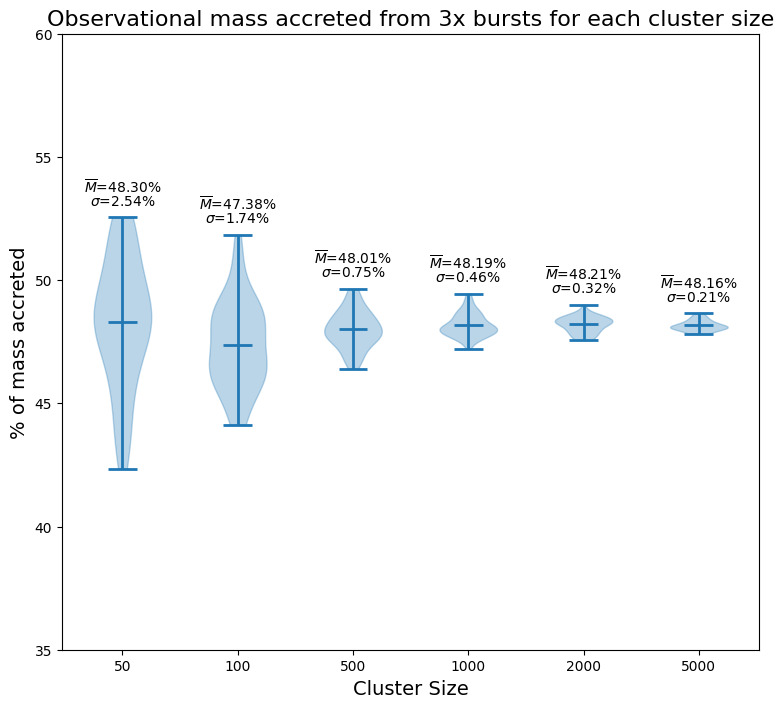

In [599]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac3_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac3_500,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac3_1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac3_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac3_5000,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)
    
string50mean='{:.2f}%'.format(mean50)
string50std='{:.2f}%'.format(std50)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)
string500mean='{:.2f}%'.format(mean500)
string500std='{:.2f}%'.format(std500)
string1000mean='{:.2f}%'.format(mean1000)
string1000std='{:.2f}%'.format(std1000)
string2000mean='{:.2f}%'.format(mean2000)
string2000std='{:.2f}%'.format(std2000)
string5000mean='{:.2f}%'.format(mean5000)
string5000std='{:.2f}%'.format(std5000)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(35,60)
ax1.text(1,np.max(frac3_50)+1,'$\overline{M}$='+string50mean,ha='center')
ax1.text(1,np.max(frac3_50)+0.5,'$\sigma$='+string50std,ha='center')
ax1.text(2,np.max(frac3_100)+1,'$\overline{M}$='+string100mean,ha='center')
ax1.text(2,np.max(frac3_100)+0.5,'$\sigma$='+string100std,ha='center')
ax1.text(3,np.max(frac3_500)+1,'$\overline{M}$='+string500mean,ha='center')
ax1.text(3,np.max(frac3_500)+0.5,'$\sigma$='+string500std,ha='center')
ax1.text(4,np.max(frac3_1000)+1,'$\overline{M}$='+string1000mean,ha='center')
ax1.text(4,np.max(frac3_1000)+0.5,'$\sigma$='+string1000std,ha='center')
ax1.text(5,np.max(frac3_2000)+1,'$\overline{M}$='+string2000mean,ha='center')
ax1.text(5,np.max(frac3_2000)+0.5,'$\sigma$='+string2000std,ha='center')
ax1.text(6,np.max(frac3_5000)+1,'$\overline{M}$='+string5000mean,ha='center')
ax1.text(6,np.max(frac3_5000)+0.5,'$\sigma$='+string5000std,ha='center')


plt.title('Observational mass accreted from 3x bursts for each cluster size',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot3x.jpeg',dpi=300,bbox_inches='tight')
plt.show()  